<a href="https://colab.research.google.com/github/RajaChowdhury/Retail-Sales-Prediction---Capstone-Project/blob/main/Colab_Notebook_Rossmann_Sales_Prediction_Raja_Chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

# <b> Problem Description </b>
---
### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <b> Data Description </b>
---
### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a (Store, Date) duple within the test set
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what you are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* #### **StoreType** - differentiates between 4 different store models: a, b, c, d
* #### **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **Introduction to Rossmann**
---
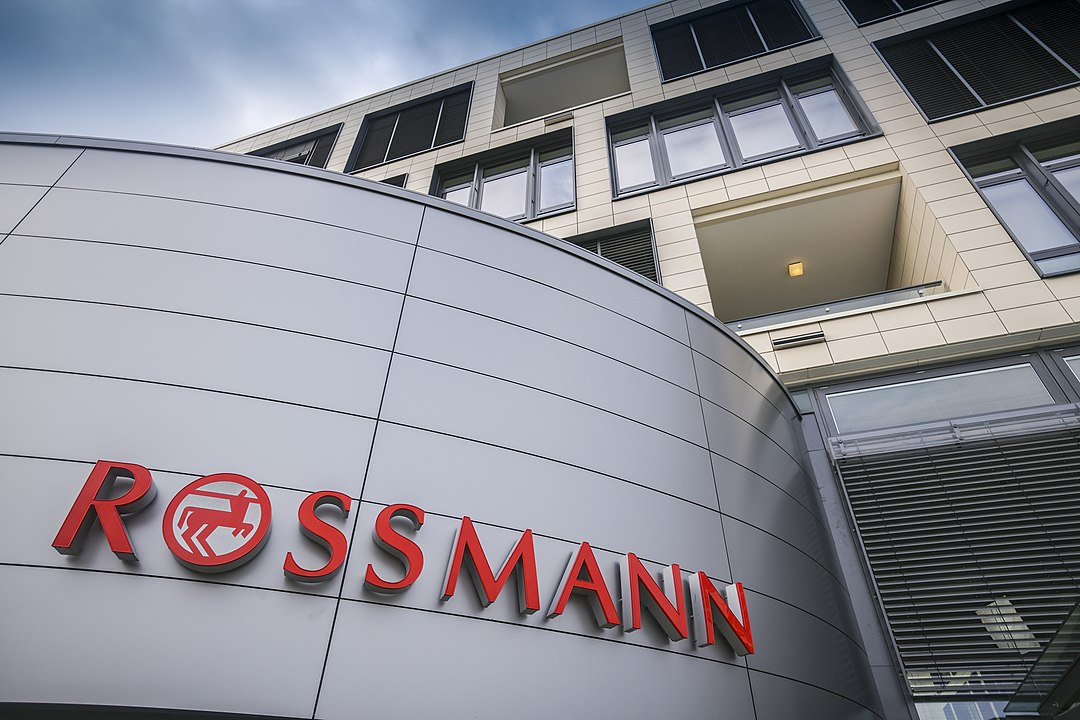

**Dirk Rossmann GmbH**, commonly referred to as **Rossmann**, is one of the largest drug store chains in Europe with around 56,200 employees and more than 4000 stores. The company was founded in 1972 by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany. The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%, which was taken over from the Dutch Kruidvat in 2004.

In 2019 Rossmann had more than €10 billion turnover in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain. In 2021, sales increased by 8.1 percent to 11.1 billion euros. There are a total of 4,361 Rossmann branches, 2,231 of which are in Germany.

The product range includes up to 21,700 items and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a perfume range with around 200 commercial brands. Rossmann has 29 private brands with 4600 products (as of 2019). In 1997, the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The best-known Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and laundry detergents) alouette (paper tissues etc). 


# Steps performed in this ML(Supervised) Project
---

Handling dataset with the fundamental steps to unvail the factors :

* Imports Libraries, Dataset and Other modules.
* Understanding Our Dataset.
* Analysing Data : Reading & Inspection of Data.
    *   Data Structure (Head, Tail, Shape)
    *   Data information (Basic Schema)
    *   Arithmatic measurement (Statistical Values)
    *Merging both the datasets
    * Further analysing both the datasets
* Data Preparation & Processing.
    *   Cleaning Null Values
    *   Dropping unnecessary columns
* Exploratory Analysis
    *   Categorical Data Visualisation
    *   Numerical Data Visualisation
* Key Findings and Conclusion


# <b>1. Importing Required Libraries And Loading The Datasets
---

**Importing Liabraries**

In [56]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm


# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting The Drive**

In [57]:
# Mounting My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading The Datasets**

In [58]:
# Loading My Datasets
df1 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/Rossmann Stores Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/store.csv")

# **2. Overview Of The Datasets**

---



### **First Dataset**

In [59]:
# Top 10 Rows Of The Dataset
df1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [60]:
# Descriptive Statistic Aspects Of The Dataset.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [61]:
# Concise Summary Of The Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### **Second Dataset**

In [62]:
# Top 10 Rows Of The Dataset
df2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [63]:
# Descriptive Statistic Aspects Of The Dataset.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [64]:
# Concise Summary Of The Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### **After Merging Both The Datasets**

---


In [65]:
# Merging Both The Datasets On The Store column
df = df1.merge(df2,how='inner',left_on='Store',right_on='Store')


In [66]:
# Top 10 Rows Of The Dataframe
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [67]:
# Bottom 10 Rows Of The Dataframe
df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017199,1115,4,2013-01-10,5007,339,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017200,1115,3,2013-01-09,4649,324,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017201,1115,2,2013-01-08,5243,341,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [68]:
# Shape Of The Dataframe
Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 1017209
Number 0f columns is 18


In [69]:
# Columns Of Our Dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [70]:
# Descriptive Statistic Aspects Of The Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1017209.0,NaN,NaN,NaN,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Date,1017209,942,2015-07-31,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1017209.0,NaN,NaN,NaN,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,NaN,NaN,NaN,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,NaN,NaN,NaN,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,NaN,NaN,NaN,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
StoreType,1017209,4,a,551627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note: We can see some outliers in our dataframe.**

In [71]:
# Concise Summary Of The Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Note: We can see some null values in our dataframe.**

In [72]:
# Number Of Unique Values In Each Columns
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

# **3. Data Processing And Feature Engineering**

---



### **Extracting Date**

In [73]:
# Checking Our Dataset Period
df.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

**So, we have a dataset for a period of approx 2.6yrs(From 1st January,2013 to 31st June,2015)**

In [74]:
# Converting the Date Column Data Type To DateTime 

df["Date"]=pd.to_datetime(df["Date"])

In [75]:
# Extracting Date,Year,Month,Day,Week,WeekOfYear from Date column for dataset transformation

df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Week"]=df["Date"].dt.week%4
df["WeekOfYear"]=df["Date"].dt.week

**Here we have extracted Date, Year, Month, Day, Week, WeekOfYear from Date column for further analysis.**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [77]:
# Dropping Unnecessary Columns
#df=df.drop(['Date'],axis=1) 

### **Combining And Creating columns**

**PromoOpen**

In [78]:
# Creating New Column From Existing Columns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

**Here we have created new column called "PromoOpen" to measure the period from whem the store is participating in the Promo2(in months).**

In [79]:
#Lets Check Our Columns
df[['Date','Promo','Promo2','PromoInterval','Promo2SinceYear', 'Promo2SinceWeek', 'PromoOpen']].sample(10)

,Date,Promo,Promo2,PromoInterval,Promo2SinceYear,Promo2SinceWeek,PromoOpen
534894,2015-02-03,1,1,"Jan,Apr,Jul,Oct",2011.0,14.0,46.50
396088,2014-03-10,0,0,NaN,NaN,NaN,NaN
863211,2015-07-06,0,0,NaN,NaN,NaN,NaN
293127,2014-10-13,0,1,"Feb,May,Aug,Nov",2013.0,5.0,20.75
896029,2014-06-01,0,1,"Jan,Apr,Jul,Oct",2014.0,1.0,5.75
853965,2015-07-16,1,0,NaN,NaN,NaN,NaN
476282,2015-01-14,1,0,NaN,NaN,NaN,NaN
36846,2015-05-06,1,1,"Jan,Apr,Jul,Oct",2013.0,31.0,21.25
166520,2013-07-03,1,0,NaN,NaN,NaN,NaN
740362,2014-04-05,0,0,NaN,NaN,NaN,NaN


In [80]:
# Checking PromoOpen Negative figures 
df[df["PromoOpen"]<0].head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,WeekOfYear,PromoOpen
17926,20,1,2014-06-30,9229,954,1,1,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,30,3,27,-4.0
17927,20,7,2014-06-29,0,0,0,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,29,2,26,-4.0
17928,20,6,2014-06-28,5572,566,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,28,2,26,-4.0
17929,20,5,2014-06-27,7149,839,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,27,2,26,-4.0
17930,20,4,2014-06-26,8118,997,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,26,2,26,-4.0
17931,20,3,2014-06-25,7212,911,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,25,2,26,-4.0
17932,20,2,2014-06-24,7104,854,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,24,2,26,-4.0
17933,20,1,2014-06-23,7856,946,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,23,2,26,-4.0
17934,20,7,2014-06-22,0,0,0,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,22,1,25,-4.0
17935,20,6,2014-06-21,4862,499,1,0,0,0,d,...,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,21,1,25,-4.0


In [81]:
# Replacing Those Negative Figures With Zero 
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

**Here PromoOpen column has figures in negative which indicates that the store have not started any promo yet. So we have replace those negative figures with zero**.

**CompetitionOpen**

In [82]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

**Here we have created new column called "CompetitionOpen" to measure the period from whem the nearest competition has opened(in months)**

In [83]:
#Lets Check Our Columns
df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
863166,2013-01-20,460.0,2014.0,3.0,-14.0
394451,2014-01-06,30030.0,2010.0,11.0,38.0
441364,2015-02-03,14300.0,2011.0,3.0,47.0
248401,2013-04-27,8480.0,NaN,NaN,NaN
585554,2014-10-10,230.0,2010.0,6.0,52.0
744229,2013-06-26,140.0,2006.0,3.0,87.0
727842,2013-12-10,2700.0,NaN,NaN,NaN
298094,2014-01-29,3130.0,2002.0,7.0,138.0
141255,2013-12-27,2020.0,2011.0,2.0,34.0
1012488,2013-01-11,900.0,2010.0,9.0,28.0


In [84]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,WeekOfYear,PromoOpen,CompetitionOpen
3890,5,2,2015-03-31,7692,659,1,1,0,0,a,...,NaN,NaN,NaN,2015,3,31,2,14,NaN,-1.0
3891,5,1,2015-03-30,8847,770,1,1,0,0,a,...,NaN,NaN,NaN,2015,3,30,2,14,NaN,-1.0
3892,5,7,2015-03-29,0,0,0,0,0,0,a,...,NaN,NaN,NaN,2015,3,29,1,13,NaN,-1.0
3893,5,6,2015-03-28,2038,219,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,28,1,13,NaN,-1.0
3894,5,5,2015-03-27,4181,499,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,27,1,13,NaN,-1.0
3895,5,4,2015-03-26,3711,460,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,26,1,13,NaN,-1.0
3896,5,3,2015-03-25,4325,613,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,25,1,13,NaN,-1.0
3897,5,2,2015-03-24,4073,537,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,24,1,13,NaN,-1.0
3898,5,1,2015-03-23,4028,540,1,0,0,0,a,...,NaN,NaN,NaN,2015,3,23,1,13,NaN,-1.0
3899,5,7,2015-03-22,0,0,0,0,0,0,a,...,NaN,NaN,NaN,2015,3,22,0,12,NaN,-1.0


In [85]:
# Replacing Those Negative Figures With Zero
df.loc[df["CompetitionOpen"]<0, "CompetitionOpen" ] = 0

**Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero**.

In [86]:
# Finally Dropping Irrelevant COlumns
df = df.drop(["Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth"], axis=1) #'Date'"PromoInterval",

### **Null Value Treatment**

In [87]:
#Checking the number of Null Values in our columns.
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

CompetitionDistance column has 2642 null values.

PromoInterval column has 508031 null values.

PromoOpen column has 508031 null values.

CompetitionOpen column has 323348 null values.



**Note: PromoInterval and PromoOpen has similar number of null values which means when promo is not open then promo have no interval as well.**

In [88]:
# Checking the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
print(missing_value)

                      Total  Percentage
PromoOpen            508031   49.943620
PromoInterval        508031   49.943620
CompetitionOpen      323348   31.787764
CompetitionDistance    2642    0.259730
WeekOfYear                0    0.000000
Week                      0    0.000000
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
Promo2                    0    0.000000
Store                     0    0.000000
DayOfWeek                 0    0.000000
StoreType                 0    0.000000
SchoolHoliday             0    0.000000
StateHoliday              0    0.000000
Promo                     0    0.000000
Open                      0    0.000000
Customers                 0    0.000000
Sales                     0    0.000000
Date                      0    0.000000
Assortment                0    0.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1014567 non-null  float64       
 12  Promo2               1017209 non-null  int64         
 1

In [90]:
print("0 = store is not participating, 1 = store is participating")
df.Promo2.value_counts()

0 = store is not participating, 1 = store is participating


1    509178
0    508031
Name: Promo2, dtype: int64

In [91]:
# Checking dataset when Promo2 is zero
df[df["Promo2"]==0].sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,Week,WeekOfYear,PromoOpen,CompetitionOpen
753557,828,4,2015-04-23,3889,501,1,0,0,0,d,...,3290.0,0,NaN,2015,4,23,1,17,NaN,4.0
500301,549,4,2013-10-24,4334,536,1,1,0,0,a,...,2330.0,0,NaN,2013,10,24,3,43,NaN,NaN
483819,531,2,2015-01-13,5129,601,1,1,0,0,a,...,4030.0,0,NaN,2015,1,13,3,3,NaN,NaN
157667,175,4,2015-07-16,7444,763,1,1,0,1,c,...,4130.0,0,NaN,2015,7,16,1,29,NaN,NaN
261856,289,6,2014-03-22,6189,566,1,0,0,0,d,...,6540.0,0,NaN,2014,3,22,0,12,NaN,75.0
322144,354,5,2013-10-11,8789,706,1,1,0,0,d,...,1500.0,0,NaN,2013,10,11,1,41,NaN,96.0
301985,332,6,2013-09-28,1450,206,1,0,0,0,a,...,1840.0,0,NaN,2013,9,28,3,39,NaN,90.0
456735,501,3,2013-10-30,6080,727,1,0,0,1,a,...,1620.0,0,NaN,2013,10,30,0,44,NaN,85.0
190767,211,4,2014-03-27,11038,1409,1,0,0,0,a,...,350.0,0,NaN,2014,3,27,1,13,NaN,88.0
997351,1093,6,2013-02-23,5472,570,1,0,0,0,c,...,10450.0,0,NaN,2013,2,23,0,8,NaN,44.0


**Note: We have found out that whenever the store is not participating in Promo2, we had null values present in PromoOpen and PromoInterval columns. So we can impute PromoOpen and PromoInterval with zero because logically when promo2 is zero then PromoOpen and PromoInterval should be zero as well.**


In [92]:
#Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.PromoOpen = df['PromoOpen'].transform(impute_zero)
df.PromoInterval = df['PromoInterval'].transform(impute_zero)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

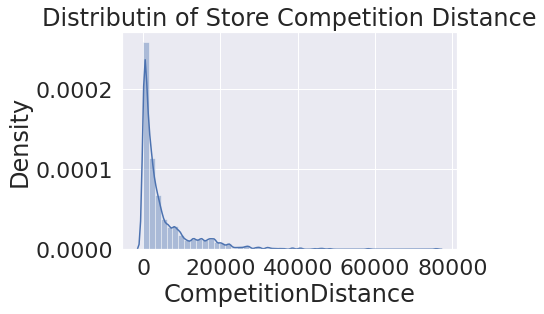

In [93]:
# let's first have a look at its distribution of CompetitionDistance
sns.distplot(df.CompetitionDistance)
plt.title("Distributin of Store Competition Distance")

In [94]:
# Filling null values using median as CompetitionDistance column have skewness towards right
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True) 

In [95]:
# Filling null values using mode as CompetitionOpen column is made by combining the two categorical columns
df['CompetitionOpen'].fillna(df['CompetitionOpen'].mode()[0], inplace = True)

In [96]:
#Better To Double Check
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
PromoInterval          0
Year                   0
Month                  0
Day                    0
Week                   0
WeekOfYear             0
PromoOpen              0
CompetitionOpen        0
dtype: int64

### **Handling Outliers**

In [97]:
# let's look at the statistical aspects of the dataframes for determining outliners.
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,Week,WeekOfYear,PromoOpen,CompetitionOpen
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01,1.308429e+01,4.203993e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01,1.897466e+01,6.534447e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01,0.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01,2.500000e+01,7.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01,7.125000e+01,1.386000e+03


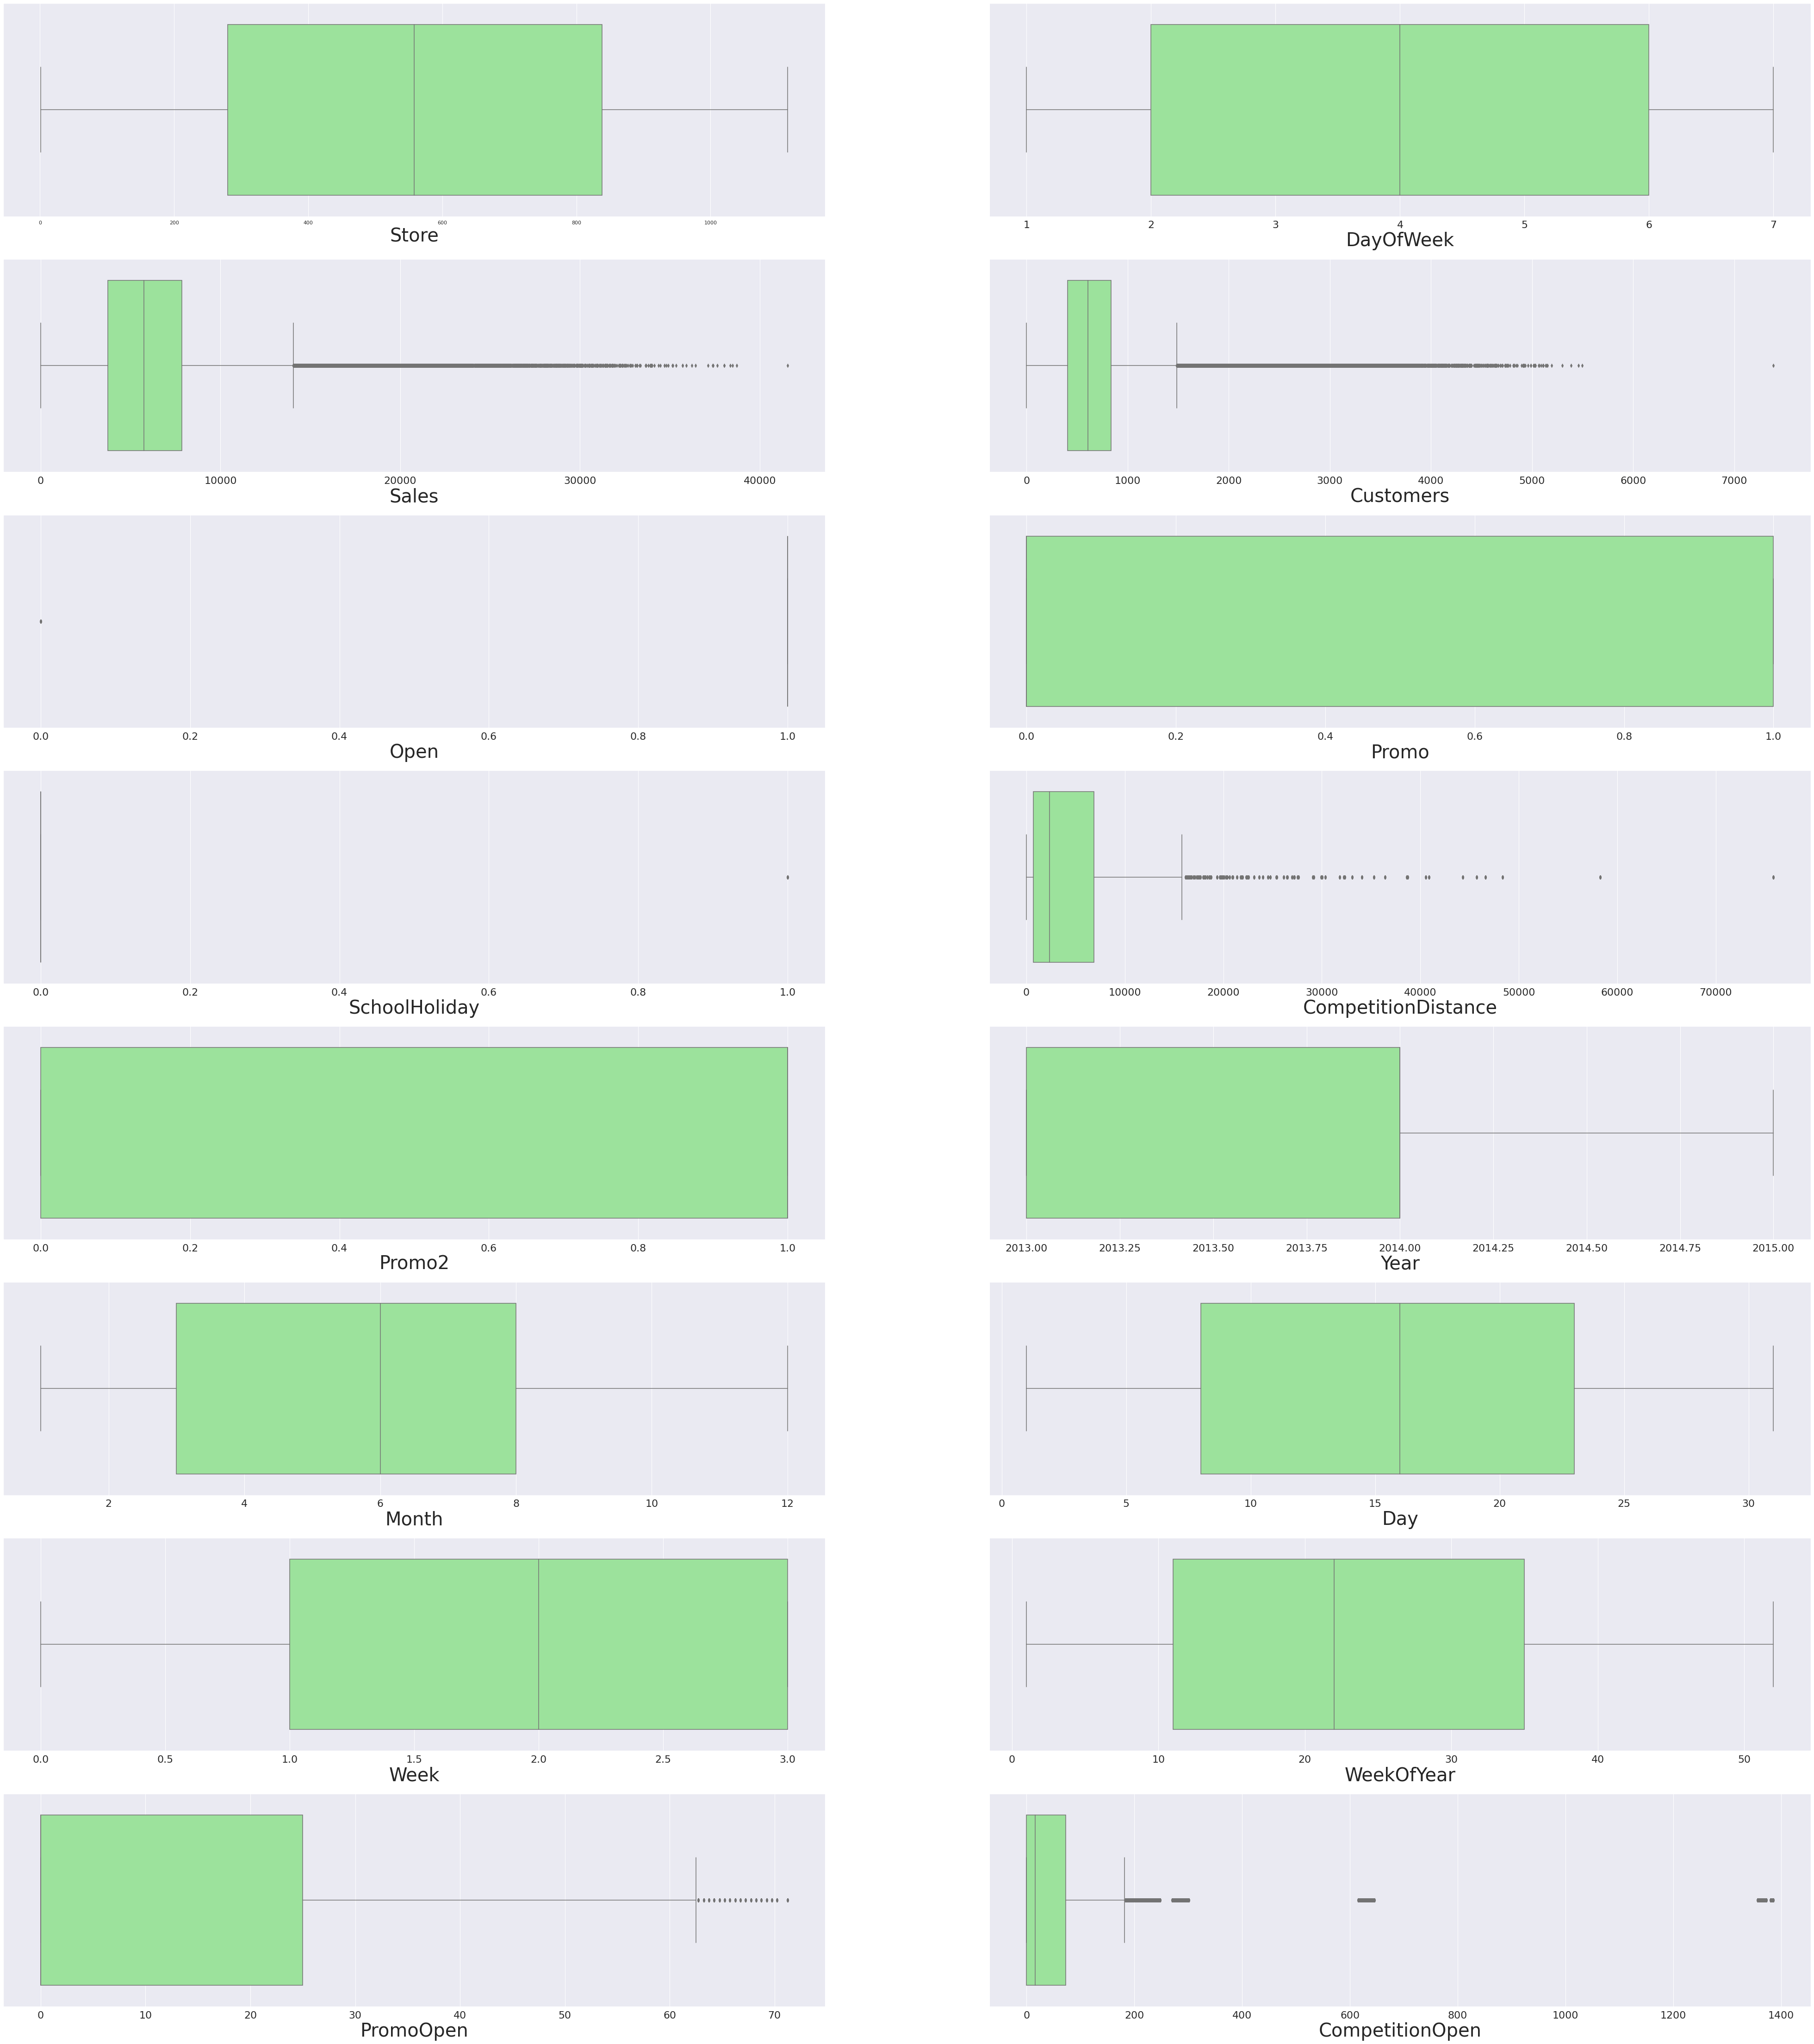

In [98]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)


In [99]:
#Capping the outlier rows with Percentiles

upper_lim = df['Sales'].quantile(.95)
lower_lim = df['Sales'].quantile(.05)
df.loc[(df["Sales"] > upper_lim),"Sales"] = upper_lim
df.loc[(df["Sales"] < lower_lim),"Sales"] = lower_lim

upper_lim = df['CompetitionDistance'].quantile(.95)
lower_lim = df['CompetitionDistance'].quantile(.05)
df.loc[(df["CompetitionDistance"] > upper_lim),"CompetitionDistance"] = upper_lim
df.loc[(df["CompetitionDistance"] < lower_lim),"CompetitionDistance"] = lower_lim

upper_lim = df['CompetitionOpen'].quantile(.95)
lower_lim = df['CompetitionOpen'].quantile(.05)
df.loc[(df["CompetitionOpen"] > upper_lim),"CompetitionOpen"] = upper_lim
df.loc[(df["CompetitionOpen"] < lower_lim),"CompetitionOpen"] = lower_lim

upper_lim = df['PromoOpen'].quantile(.95)
lower_lim = df['PromoOpen'].quantile(.05)
df.loc[(df["PromoOpen"] > upper_lim),"PromoOpen"] = upper_lim
df.loc[(df["PromoOpen"] < lower_lim),"PromoOpen"] = lower_lim

upper_lim = df['Customers'].quantile(.95)
lower_lim = df['Customers'].quantile(.05)
df.loc[(df["Customers"] > upper_lim),"Customers"] = upper_lim
df.loc[(df["Customers"] < lower_lim),"Customers"] = lower_lim

### **Multicollinearity**

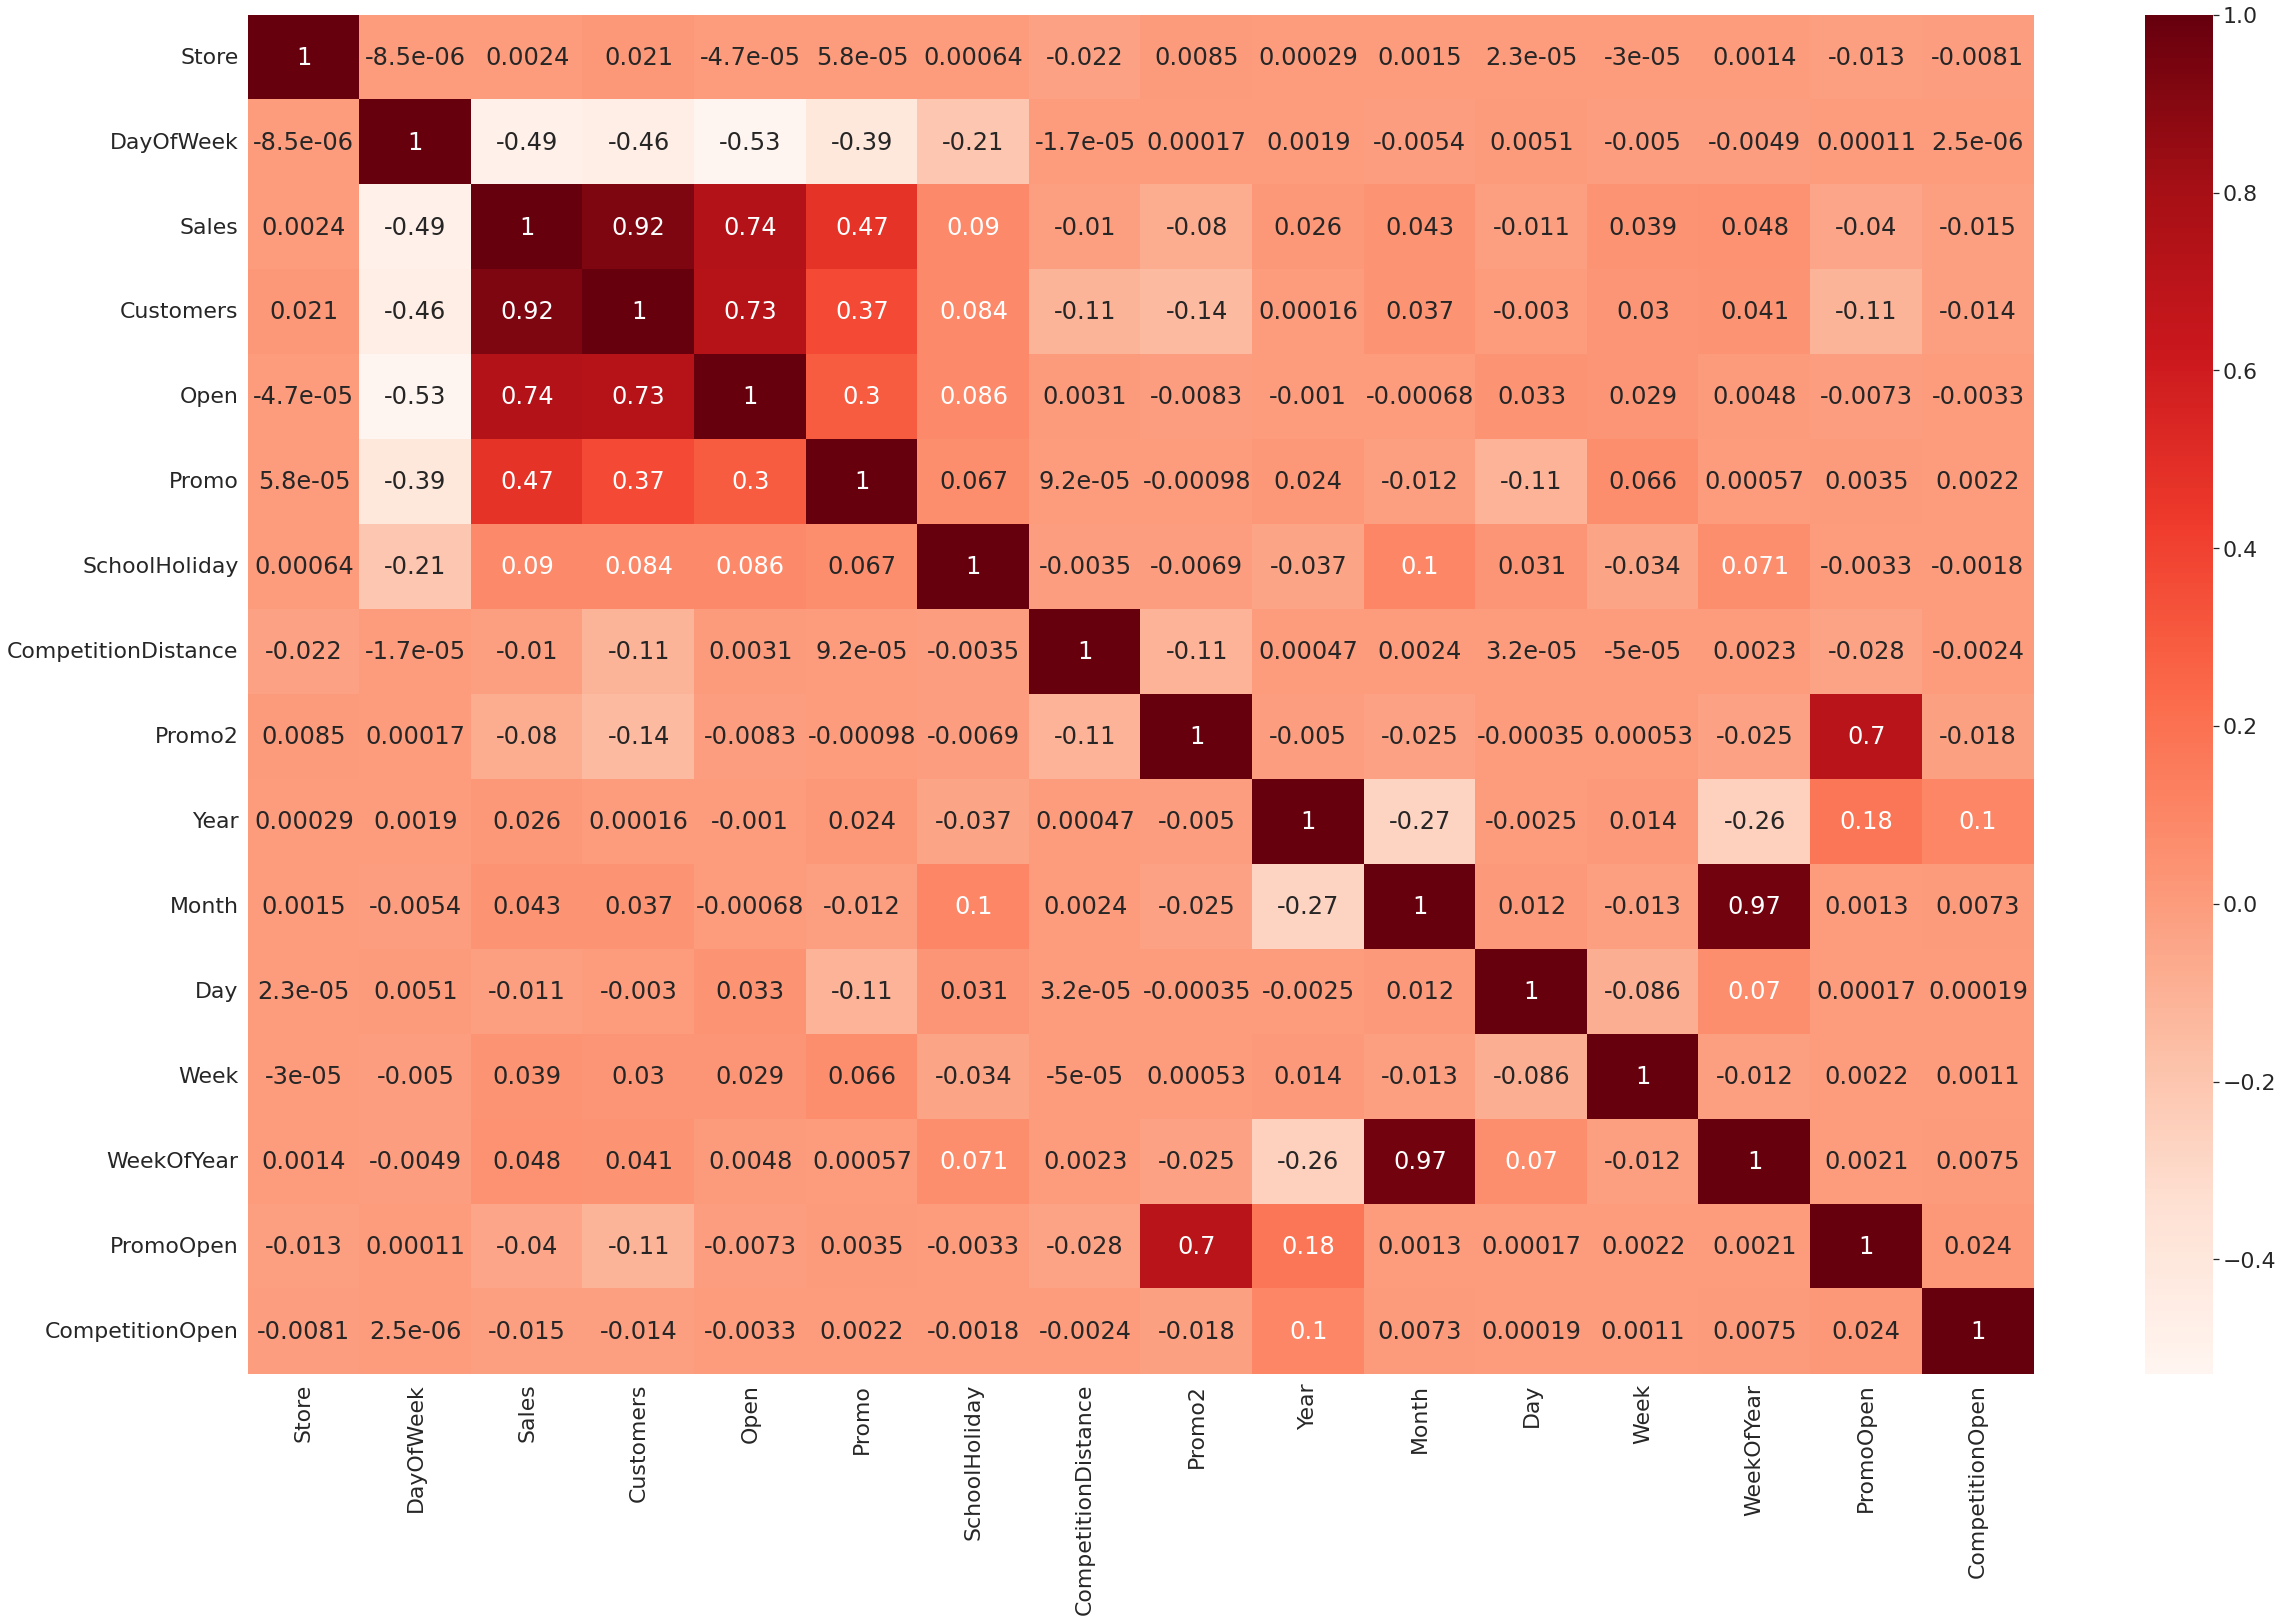

In [46]:
#let's analysize if there is any numerical corelation.

plt.figure(figsize=(40,25))
ml_corr = df.corr()
heatmap=sns.heatmap(ml_corr ,cbar=True,annot=True, cmap="Reds")

In [100]:
df=df.drop(["WeekOfYear"], axis=1)

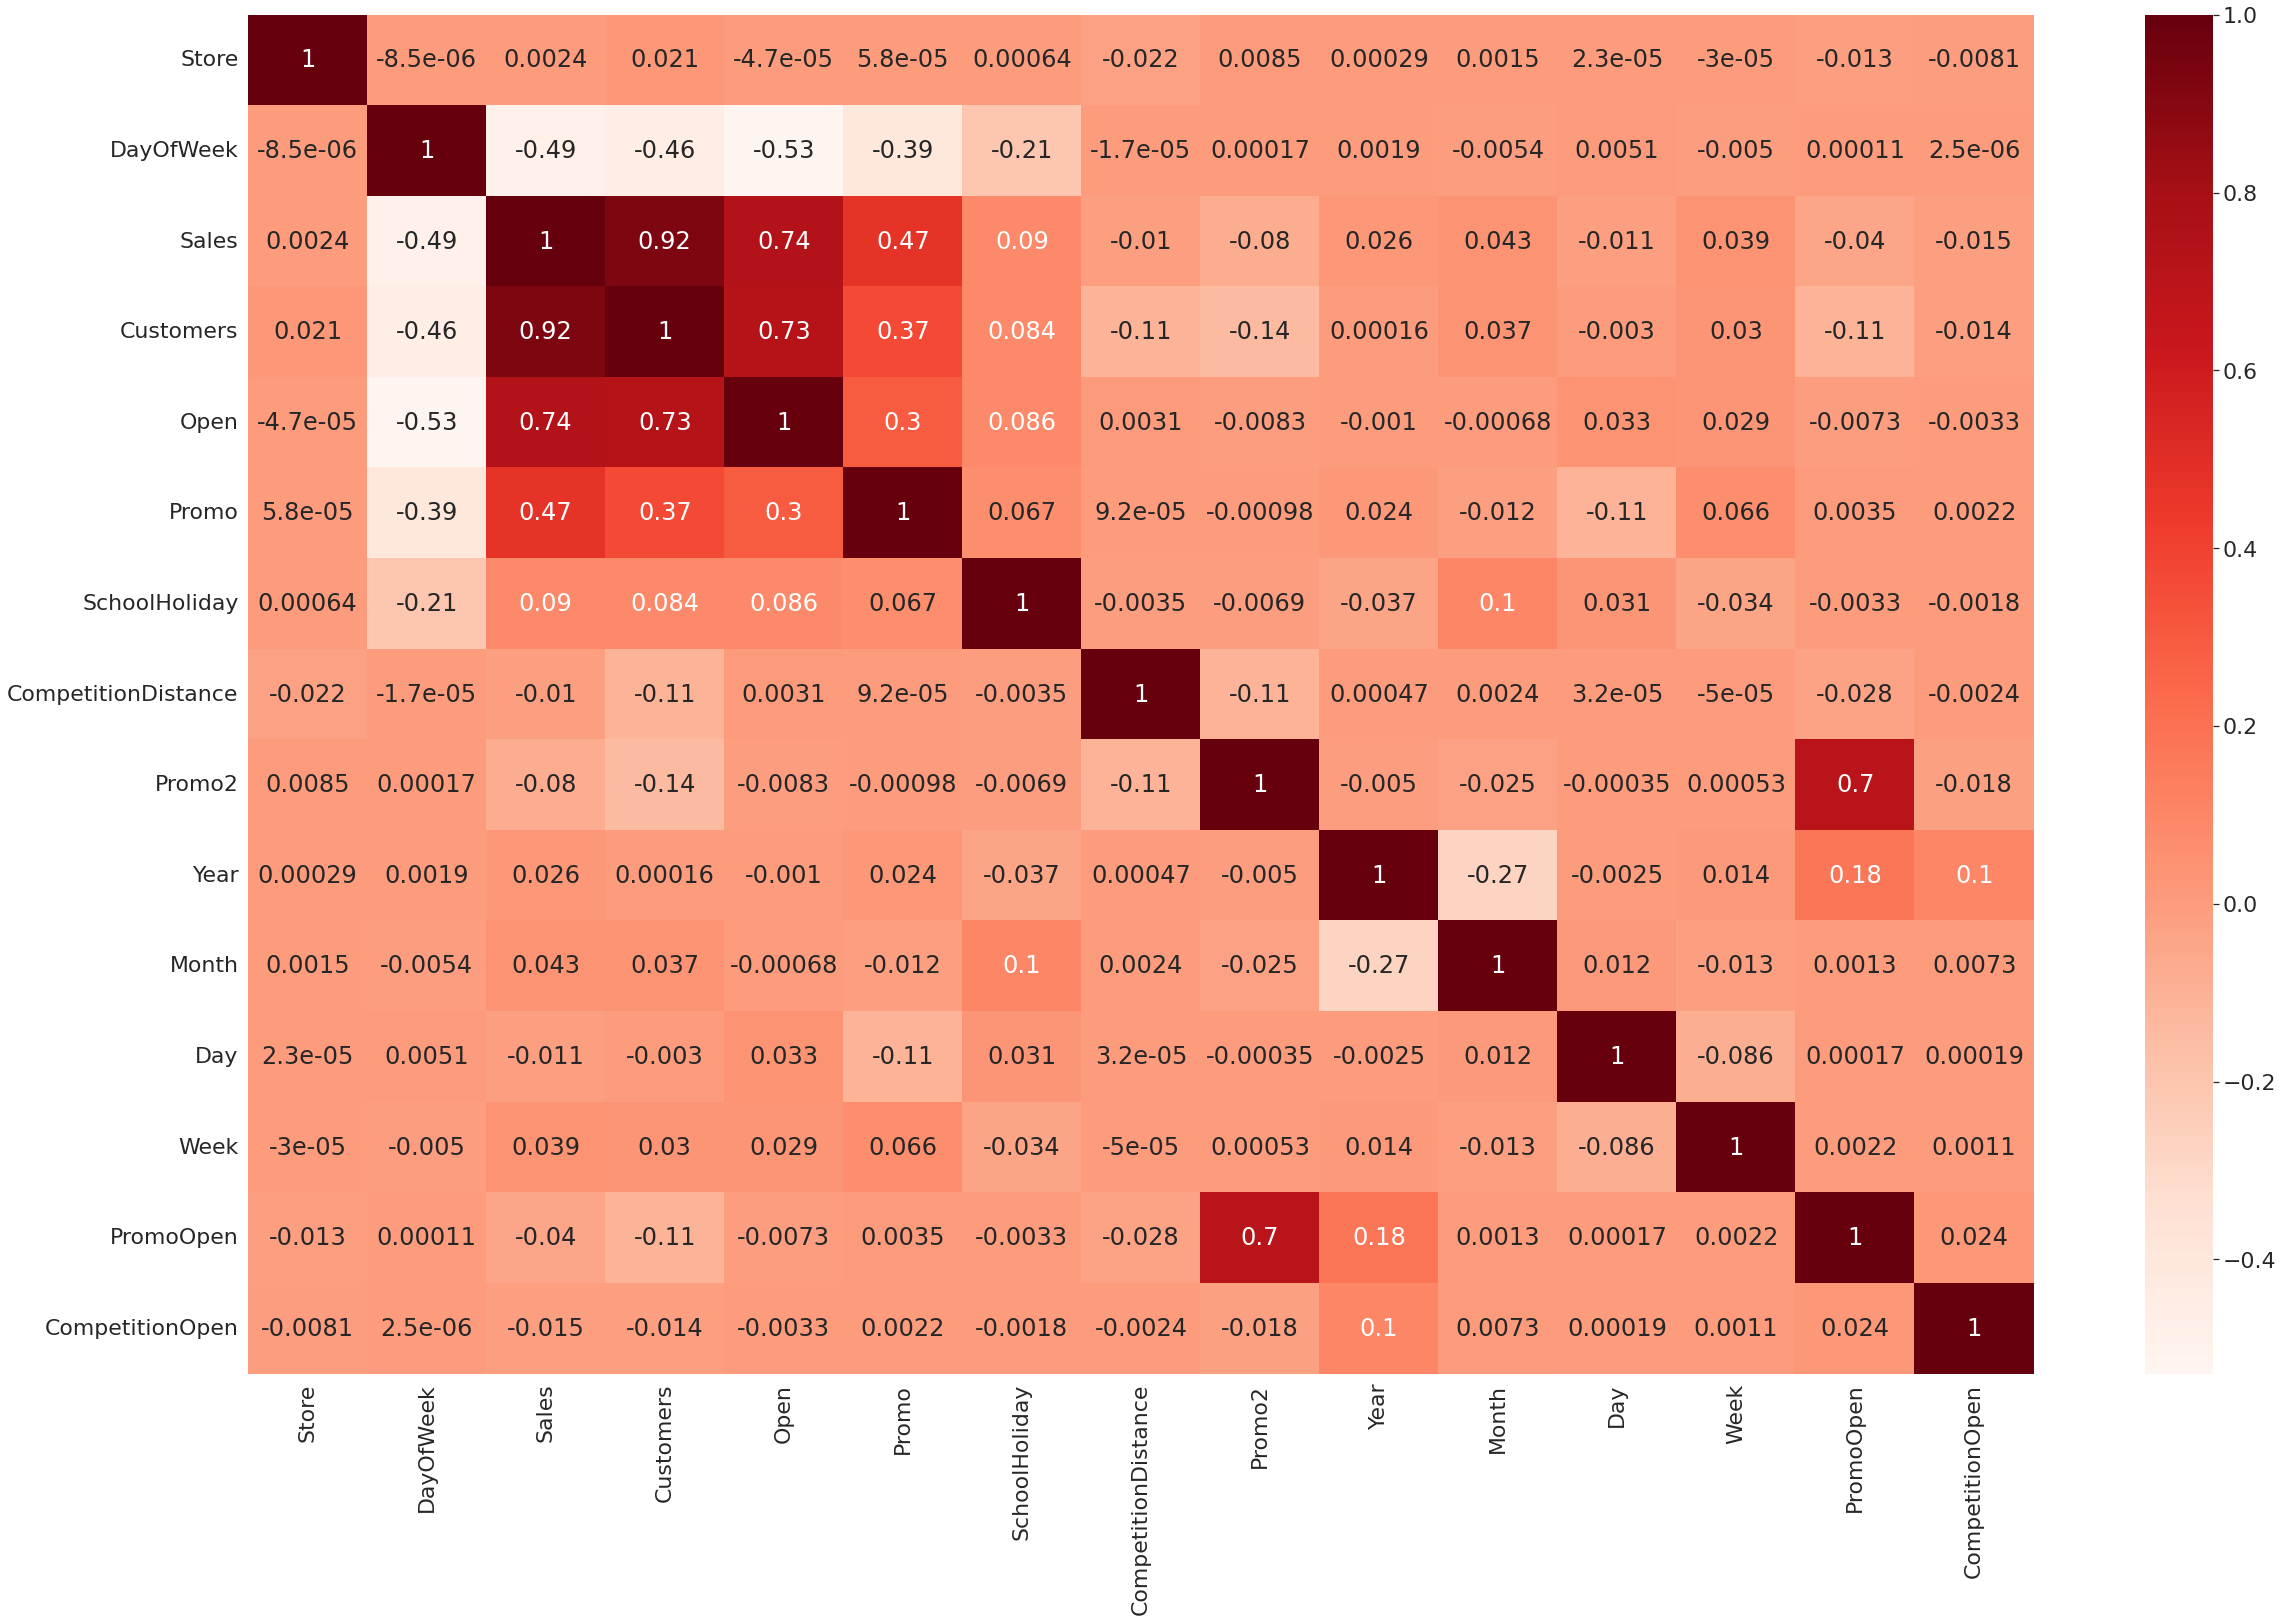

In [101]:
plt.figure(figsize=(40,25))
ml_corr = df.corr()
heatmap=sns.heatmap(ml_corr ,cbar=True,annot=True, cmap="Reds")

### **Log Transformation**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  float64       
 11  Promo2               1017209 non-null  int64         
 12  PromoInterval        1017209 non-null  object        
 1

In [ ]:
# x is Independent variable
#x = df.loc[:,df.columns!='Sales'] 

# y is Dependent variable
#y = df['Sales']                             

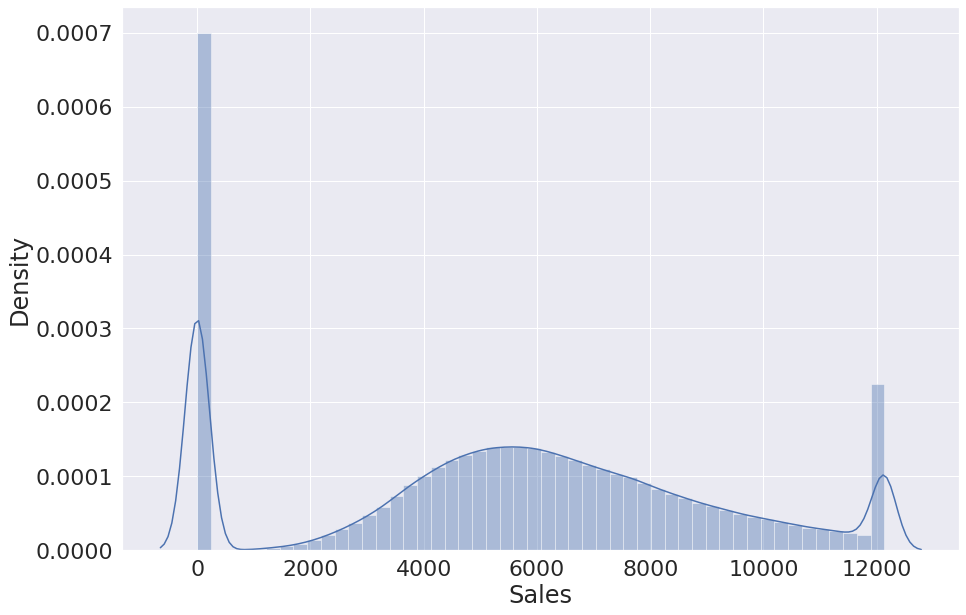

In [50]:
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

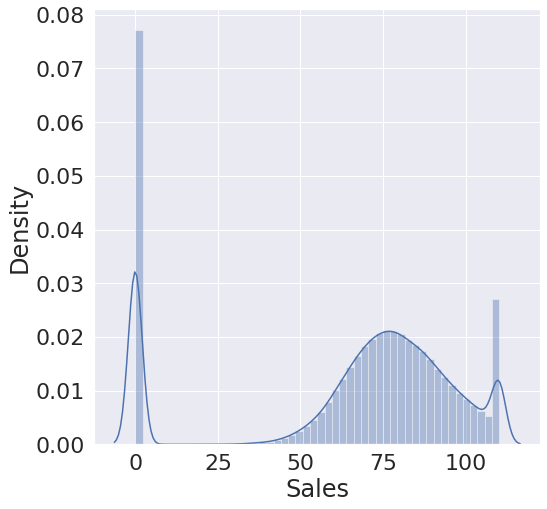

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(np.sqrt(df['Sales']))

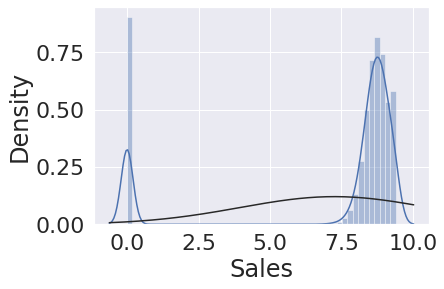

<Figure size 576x576 with 0 Axes>

In [ ]:
# It looks more normal now.
sns.distplot((df['Sales']+1).transform(np.log), fit=norm);
fig = plt.figure(figsize=(8,8))

# **4. Visualisations**


---



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  float64       
 11  Promo2               1017209 non-null  int64         
 12  PromoInterval        1017209 non-null  object        
 1

In [52]:
df.nunique()

Store                   1115
DayOfWeek                  7
Date                     942
Sales                  11282
Open                       2
Promo                      2
StateHoliday               5
SchoolHoliday              2
StoreType                  4
Assortment                 3
CompetitionDistance      591
Promo2                     2
PromoInterval              4
Year                       3
Month                     12
Day                       31
Week                       4
PromoOpen                212
CompetitionOpen          144
dtype: int64

Text(0.5, 1.0, 'Assortment')

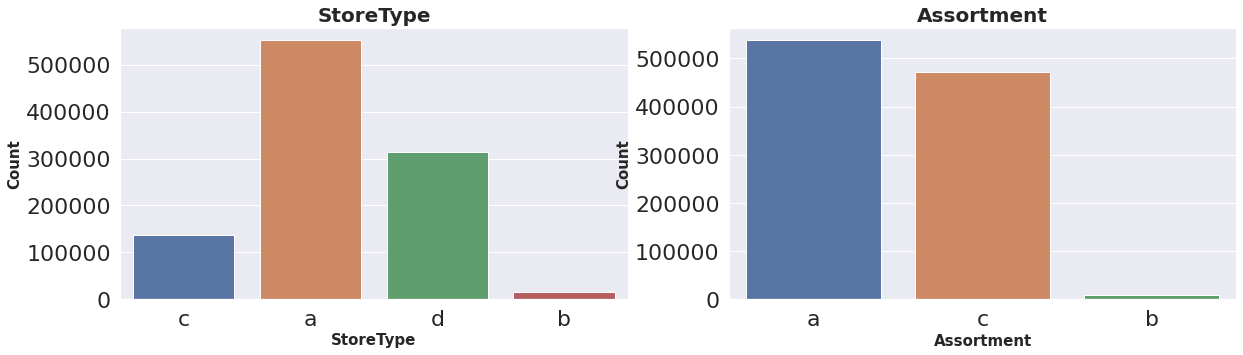

In [102]:
# Plotting a subplot bar graph for Store Type
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.countplot(df['StoreType'])
ax.set_xlabel('StoreType',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("StoreType",fontsize=20,fontdict={"weight": "bold"})

#  Plotting a subplot bar graph for Assortment
plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Assortment",fontsize=20,fontdict={"weight": "bold"})

From the first graph it is clear that store model 'a' has  highest count.

From second graph assortment level is basic in most cases. **bold text** **bold text**

Text(0.5, 1.0, 'Effect of Promo on Sales and Customers')

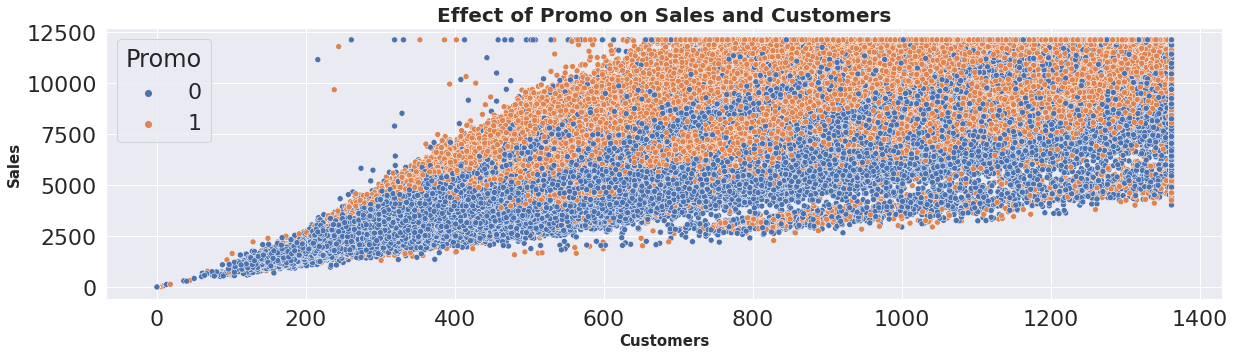

In [111]:
# Plotting Effect of Promo on Sales and Customers using scatterplot
plt.figure(figsize=(20,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Effect of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})